<a href="https://colab.research.google.com/github/loosak/python-deepdive/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐍 Python Deep Dive Notes 1.2


author: Fred Baptiste


Numeric Types, Functions and Functional Programming, Closures, Decorators, Modules and Packages



# Numeric Types

Boolean thruth values 0(False), 1(True) `bool`

Integer Numbers $(\mathbb{Z})$ `int`

Rational Numbers $(\mathbb{Q})$  $\left\{ \frac p q | p,q \in \mathbb{Z}, q \ne 0 \right\} $ `fractions.Fractions`

Real Numbers $(\mathbb{R})$ $0, -1, 0.001, \pi$ `float` `decimal.Decimal`

Complex Numbers $(\mathbb{C})$ $\left\{ a+bi | a,b \in \mathbb{R}  \right\}$ `complex`

$$ \mathbb{Z} \subset \mathbb{Q} \subset \mathbb{R} \subset \mathbb{C} $$ 

In [ ]:
import sys
sys.getsizeof(0), sys.getsizeof(1), sys.getsizeof(63), sys.getsizeof(128), sys.getsizeof(254), sys.getsizeof(513), sys.getsizeof(2**1000)

(24, 28, 28, 28, 28, 28, 160)

In [ ]:
# c unsigned long long: 0 to 18446744073709551615
(2**64)-1 == 18446744073709551615

True

In [ ]:
sys.getsizeof(18446744073709551615)

36

## def. flor division `//`
1. floor of a real number a is the largest (in the std. number order) integer <= a

`//` .. floor division (div)

`%`  .. modulo operator (mod)

fraction = numerator/denominator

n = d * (n // d) + (n % d)

In [ ]:
155 == 4 * (155 // 4) + (155 % 4)

True

In [ ]:
import math
math.floor(math.pi), math.floor(-math.pi)

(3, -4)

In [ ]:
# limited float point precision
math.floor(-3.000_000_000_000_001), math.floor(-3.000_000_000_000_000_1)

(-4, -3)

In [ ]:
math.trunc(135/4), math.trunc(-135/4)

(33, -33)

In [ ]:
math.floor(135/4), math.floor(-135/4)

(33, -34)

In [ ]:
135//4, -135//4

(33, -34)

In [ ]:
135%4, -135%4

(3, 1)

In [ ]:
n = -135; d = 4
n = d * (n//d) + n%d
n

-135

# int constructors and bases

In [ ]:
int(True), int(False)

(1, 0)

In [ ]:
try:
  int(float('10.s2'))
except ValueError:
  print('invalid literal')

invalid literal


In [ ]:
int('1010', 2)

10

In [ ]:
int('DEADBEEF', base=16)

3735928559

In [ ]:
int(0xDEADBEEF)

3735928559

In [ ]:
bin(10), oct(10), hex(10)

('0b1010', '0o12', '0xa')

In [ ]:
int(0o1777)

1023

## What about other bases?

n: nuber (base10)
b: base (target base)

n = b * (n // b) + n % b -–> n = (n // b) * b + n % d


In [ ]:
n = 232
b = 5

n = b*(n // b) + n % d
n

230

## Base change Algorithm
n = base-10 number (>=0) b = base (>=2)

if b < 2 or n < 0: raise exception
if n == 0: return [0]

In [ ]:
n = 232
base = 12

digits = []
while n > 0:
  m = n%base
  n = n//base
  digits.insert(0, m)

digits

[1, 7, 4]

In [ ]:
base = 12
map = '0123456789ABC'

encoding = ''
for d in digits:
  encoding += map[d]

encoding = [[map[d] for d in digits]]
''.join(encoding)

'174'

In [ ]:
def from_base10(n, base=2):
  if base < 2:
    raise ValueError('Base must be >= 2')
  if n < 0: 
    raise ValueError('nuber must be >= 0')
  if n == 0:
      return [0]
  digits = []
  while n > 0:
    #m, n = n % base, n // base
    n, m = divmod(n, base)
    digits.insert(0, m)
  return digits

from_base10(4021, base=16)

[15, 11, 5]

In [ ]:
import string

def encode(digits, digit_map):
  if max(digits) >= len(digit_map):
    raise ValueError("digit map is not long enough to encode the digits")
  encoding = [digit_map[d] for d in digits]
  return ''.join(encoding)
  
encode([15, 11, 5], string.hexdigits)

'fb5'

In [ ]:
def rebase_from10(number, base):
  digit_map = string.digits + string.ascii_uppercase
  if base < 2 or base > len(digit_map):
    raise ValueError(f'Invalid base: {base} not in range <2..{len(digit_map)}>')
  sign = -1 if number < 0 else 1
  number *= sign

  digits = from_base10(number, base)
  encoding = encode(digits, digit_map)
  if sign -1:
    encoding = '-' + encoding
  return encoding

rebase_from10(314, 2)

'100111010'

In [ ]:
rebase_from10(3735928559, base=16)

'DEADBEEF'

In [ ]:
import string

m = string.digits + string.ascii_uppercase
len(m)

36

## Rational numbers 
- are fractions of int
- any real with finite number of digits


In [ ]:
import fractions

one_third = fractions.Fraction(1, 3)
float(one_third)

0.3333333333333333

In [ ]:
fractions.Fraction(6, 10)

Fraction(3, 5)

In [ ]:
fractions.Fraction(0.75)

Fraction(3, 4)

In [ ]:
fractions.Fraction(numerator=0, denominator=1) == fractions.Fraction()

True

In [ ]:
x = fractions.Fraction('22/7')
x.numerator, x.denominator

(22, 7)

In [ ]:
fractions.Fraction('1/5') + fractions.Fraction('4/5')

Fraction(1, 1)

In [ ]:
import math
fractions.Fraction(math.pi)

Fraction(884279719003555, 281474976710656)

In [ ]:
pi = fractions.Fraction(math.pi).limit_denominator(10)
pi

Fraction(22, 7)

In [ ]:
float(pi), math.pi

(3.142857142857143, 3.141592653589793)

In [ ]:
# 3/10 does not have exact float representaions
fractions.Fraction('3/10'), fractions.Fraction(3/10)

(Fraction(3, 10), Fraction(5404319552844595, 18014398509481984))

In [ ]:
f'{.3:.5f}', f'{.3:.25f}'

# float

- C `double` IEEE 754 double-precision binary float 
- binary64: 8bytes/64bits
- 1bit sign
- exponent 1.5e-16 range[-1022, 1023]
- significant digits -> 52 bits (15-17 digits base10) nozero!
- base 10 digitsals and fractions 0.75 = 7/10 + 5/100 = 7*e-1 + 5*e-2 (2 significant digits)

in general:

$ d = (-1)^{sign} \sum_{i=-m}^{n} d_{i} * 10^i$

$sign \in 0,1$ positive/negative

- some numbers cannot be represented using a finite numbers of elements $d_{i}$


### Binary representation

$(0.11)_2 = ( \frac 1{2} + \frac 1{4} )_{10}$


### float equality testing
- round both sides to the number of significante digits
- 

In [ ]:
a = 0.1 + 0.1 + 0.1
b = 0.3
a == b, f'{a:.25f} != {b:.25f}'

(False, '0.3000000000000000444089210 != 0.2999999999999999888977698')

In [ ]:
round(0.1, 1) + round(0.1, 1) + round(0.1, 1) == round(0.3, 1)

False

In [ ]:
round(0.1 + 0.1 + 0.1, 1) == round(0.3, 1)

True

In [ ]:
round(0.1 + 0.1 + 0.1, 6) == round(0.3, 1)

True

In [ ]:
import math
def is_equal(x, y, eps):
  return math.fabs(x-y) < eps

is_equal(.1+.1+.1, .3, 1e-5)

True

In [ ]:
f'{1e-5:.20f}'

'0.00001000000000000000'

## PEP 485 – A Function for testing approximate equality
Addition of an isclose() function to the standard library math module that determines whether one value is approximately equal or “close” to another value.
[PEP 485 – A Function for testing approximate equality](https://peps.python.org/pep-0485/)

`math.isclose(a, b, rel_tol=1e-9, abs_tol=0.0)`

In [ ]:
import math

x = 1000.000_000_1; a = 0.000_000_1
y = 1000.000_000_1; b = 0.000_000_1
math.isclose(x, y), math.isclose(a, b),

(True, True)

# Regular Expressions
---------------------
- [video](https://bit.ly/3uu9HMw)
- [book](https://bit.ly/3v8KFBY)
- [python notes](https://drive.google.com/file/d/1gwLNFKpe-NVLaVlFdQWpPc-2Ug36Zihq/view)


In [ ]:
import re
re_examples = [
  not re.match("a", "cat"),
  re.search("a", "cat"),
  not re.search("c", "dog"),
  3 == len(re.split("[ab]", "carbs")),
  "R-D-" == re.sub("[0-9]", "-", "R2D2") # Replace digits with dashes. 
]
assert all(re_examples), "all the regex examples should be True"

In [ ]:
import re
#m = re.match(r'[^c|d]at', 'cat mat dat pat bat', re.M|re.I)
m = re.match(r'(.*) are (.*?) .*', 'cat mat dat pat bat', re.M|re.I)
m.group()

AttributeError: ignored

In [ ]:
re.match("a", "cat")

In [ ]:
cat:str = "🐱"
cat

'🐱'

# Comprehensions

## List comprehension

To write a list comprehension, start with the expression you would normally pass to the `append` method. From there, write the for loop condition immediately after the initial expression. Lastly, put everything inside a pair of square brackets. Comprehensions can be used with dictionaries, sets, and generators, however, try to avoid them with complex expressions. Readability is key.

In [ ]:
# OK version 🤔 - For loop and append ❌ 
squares = []
for num in range(12):
    squares.append(num ** 2)

# Pythonic version 🐍: Use a list comprehension ✅
squares = [num ** 2 for num in range(12)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121]

### Bonus Tip 💡: You can also use dictionary, set, and generator comprehensions

In [ ]:
squares_dict = {num: num ** 2 for num in range(12)} # dictionary
squares_set = {num ** 2 for num in range(12)}       # set
squares_gen = (num ** 2 for num in range(12))       # generator

squares_dict, squares_set, list(squares_gen)

({0: 0,
  1: 1,
  2: 4,
  3: 9,
  4: 16,
  5: 25,
  6: 36,
  7: 49,
  8: 64,
  9: 81,
  10: 100,
  11: 121},
 {0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121},
 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121])

# Generators
**Generators** are a powerful tool to save memory and improve performance. In general, they yield one value at a time and can be iterated over multiple times. Let’s imagine we’re interested in the sum of the first 42 000 natural numbers. We could use a list comprehension to compute the values and call the built-in `sum` function. Building a list requires 351064 bytes. Using a generator reduces this value to 112 bytes. That’s pretty awesome 🔥

In [ ]:
import sys

# Inefficent way 💩: Using a list ❌
l = [item for item in range(42_000)]
sum(l), f'{sys.getsizeof(l)} bytes'

(881979000, '361296 bytes')

In [ ]:
# Efficient way 🔥: Use a generator ✅
g = (item for item in range(42_000))
sum(g), f'{sys.getsizeof(g)} bytes'

(881979000, '128 bytes')

# Using Any/All
Speaking of one-liners, Python provides some built-in functions that can check conditions that apply to at least one element, or all elements in an iterable. To illustrate this, let’s consider a simple example. Imagine we’re interested to know if a list contains negative numbers. A naive way to check this is to use a combination of a for loop and a flag. A better way is to use the any function.

- `any` - Returns True if a condition applies to any element of the iterable. If the iterable is empty, returns False.
- `all` - Returns True if a condition applies to all elements of the iterable (or if the iterable is empty).

In [ ]:
# Checking for negative values in a list
nums = [1, 2, 3, 4, 5, -42, 6, 7, 8]

# Inefficinet way 🤔 - Using a for loop and a flag ❌
contains_neg = False # flag
for num in nums:
    if num < 0:
        contains_neg = True


# Pythonic way 🐍 - Using the built-in "any" function ✅
contains_neg = any(num < 0 for num in nums) # True

# Bonus Tip 💡: Python also has a built-in "all" function ✅
contains_neg = not all(num >= 0 for num in nums) # True
contains_neg

True

# Annotation

pandas:
https://medium.com/virtuslab/pandas-stubs-how-we-enhanced-pandas-with-type-annotations-1f69ecf1519e

## Lists of lists 
- flatten

In [ ]:
from typing import List, Any

def flatten_lists(list_of_lists: List[List[Any]]) -> List[Any]:
    return [inner for outer in list_of_lists for inner in outer]


lofl: List[List[int]] =  [[i+3*(j-1) for i in range(1,4)] for j in range(1,7)]
lofl, flatten_lists(lofl)

([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

# Mandelbrot Set

[Mini-course at Princeton on High Performance Python](https://github.com/henryiii/python-performance-minicourse/blob/8be7871a7c2a30e0fab402fdf6bc35ae90acf3cb//01_fractal_accelerate.ipynb)

You can generate a Mandelbrot fractal by applying the transform:

$$
z_{n+1}=z_{n}^{2}+c
$$

repeatedly to a regular matrix of complex numbers $c$, and recording the iteration number where the value $|z|$ surpassed some bound, usually 2. You start at $z_0 = c$.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


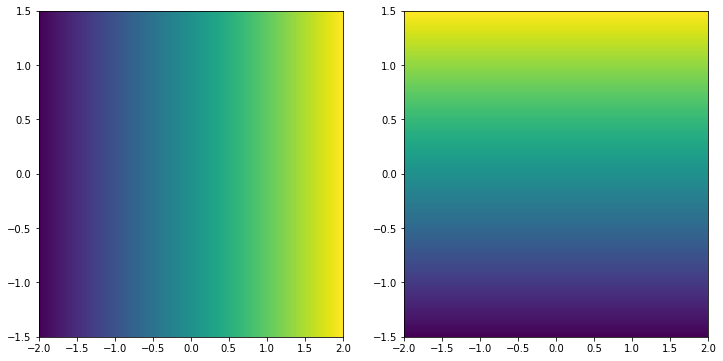

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#helper 300 x 400 matrix of complex numbers from [-1.5j, 1.5j] x [-2, 2]
c = np.sum(np.ogrid[-1.5j:1.5j:300j, -2:2:400j])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pcolormesh(c.real, c.imag, c.real)
axs[1].pcolormesh(c.real, c.imag, c.imag)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


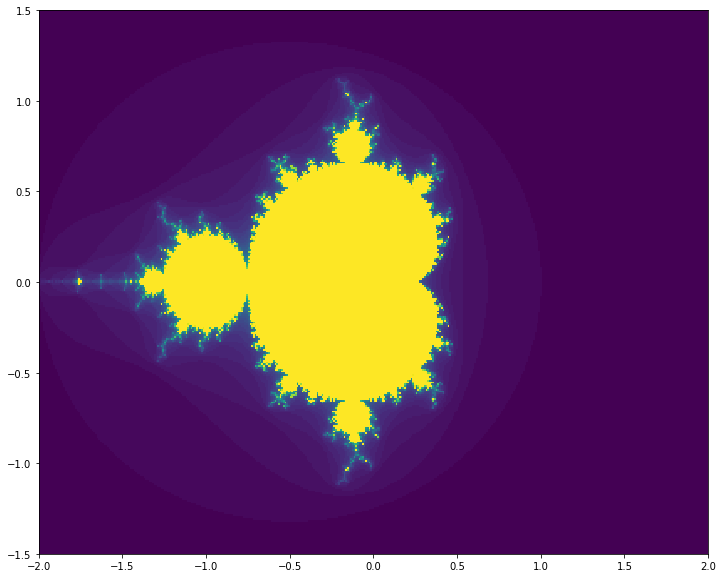

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fractal_numpy(c, maxiterations):
    f = np.zeros_like(c, dtype=np.int32)
    z = c.copy()

    for i in range(1, maxiterations + 1):
        z = z**2 + c  # Compute z
        diverge = abs(z**2) > 2**2  # Divergence criteria

        z[diverge] = 2  # Keep number size small
        f[~diverge] = i  # Fill in non-diverged iteration number

    return f

#helper 300 x 400 matrix of complex numbers from [-1.5j, 1.5j] x [-2, 2]
c = np.sum(np.ogrid[-1.5j:1.5j:300j, -2:2:400j])

fractal = fractal_numpy(c, maxiterations=50)

fig, ax = plt.subplots(figsize=(12, 10))
ax.pcolormesh(c.real, c.imag, fractal)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CPU times: user 478 ms, sys: 10.5 ms, total: 488 ms
Wall time: 508 ms


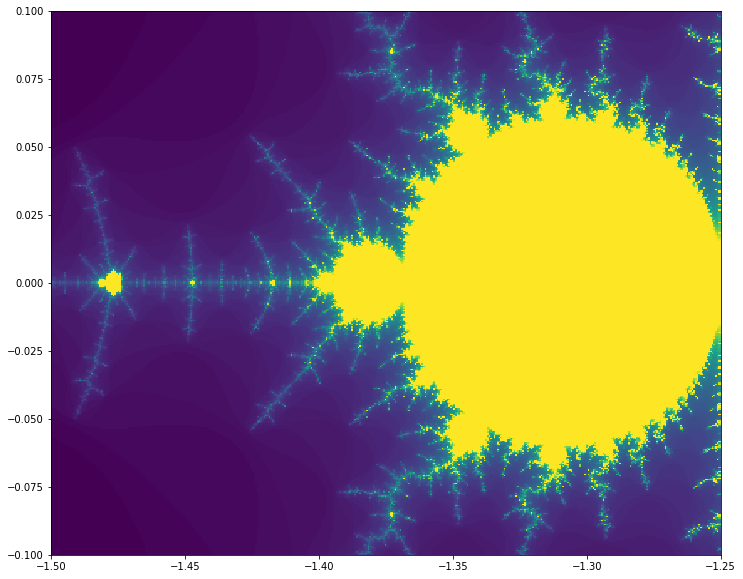

In [ ]:
%%time
c = np.sum(np.ogrid[-0.1j:0.1j:400j, -1.50:-1.25:400j])
fractal = fractal_numpy(c, maxiterations=100)

fig, ax = plt.subplots(figsize=(12, 10))
ax.pcolormesh(c.real, c.imag, fractal)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CPU times: user 1.31 s, sys: 47.1 ms, total: 1.35 s
Wall time: 1.46 s


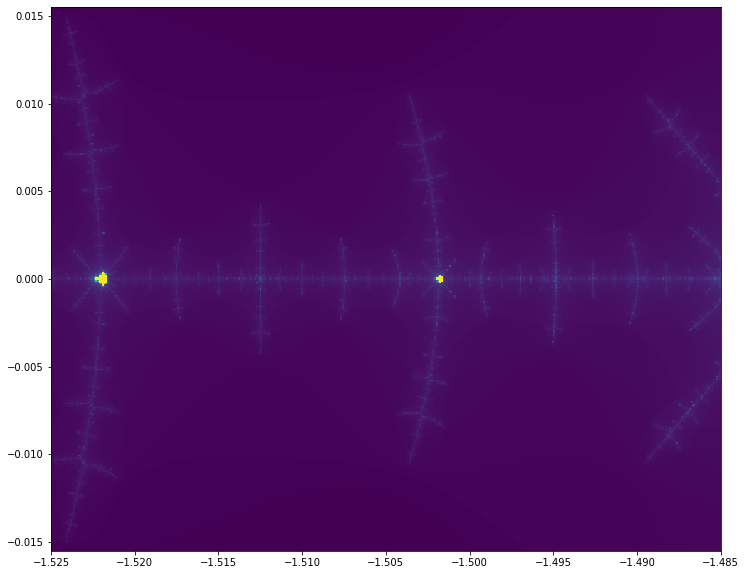

In [ ]:
%%time
c = np.sum(np.ogrid[-0.0155j:0.0155j:400j, -1.485:-1.525:400j])
fractal = fractal_numpy(c, maxiterations=256)

fig, ax = plt.subplots(figsize=(12, 10))
ax.pcolormesh(c.real, c.imag, fractal)

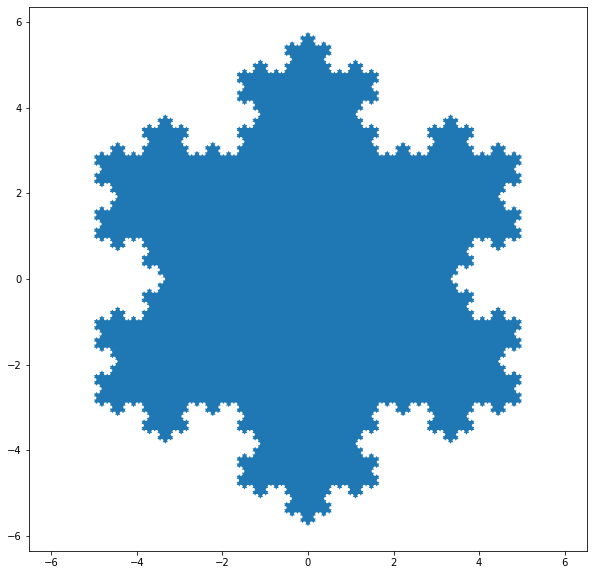

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')
ax.fill(x, y)

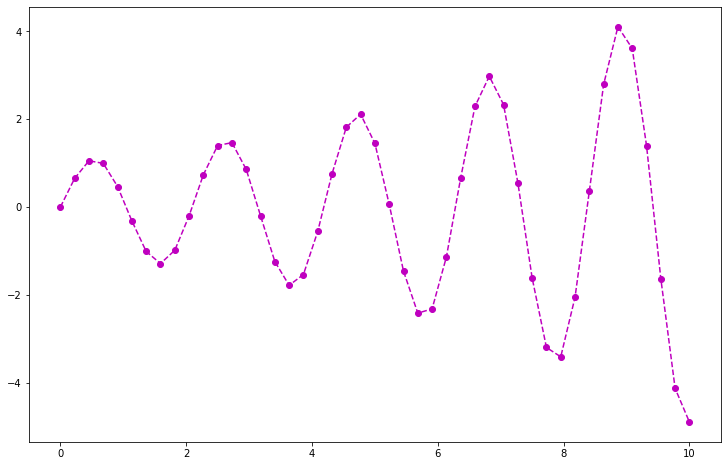

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [12.4, 8]
x3 = np.linspace(0, 10, 45)
y3 = np.exp(0.16*x3) * np.sin(3*x3)
plt.plot(x3, y3, 'm--o')

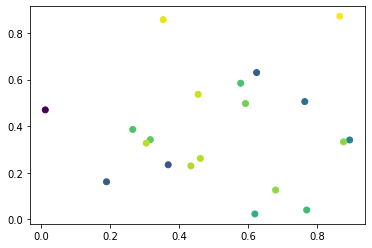

In [ ]:
plt.scatter(np.random.rand(20), np.random.rand(20), c=np.random.rand(20))

In [ ]:
np.random.rand()

0.03241629930178935

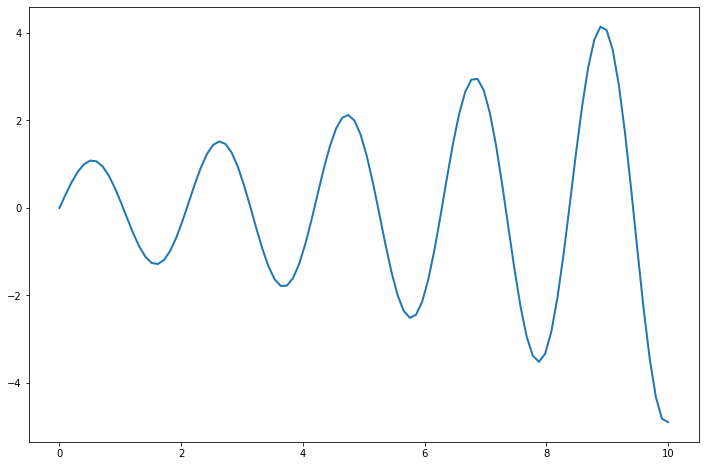

In [ ]:
x = np.linspace(0, 10, 100)
y = np.exp(0.16*x) * np.sin(3*x)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1) # one rows, one column, first plot
ax.plot(x,y, label='line 1', linewidth=2)

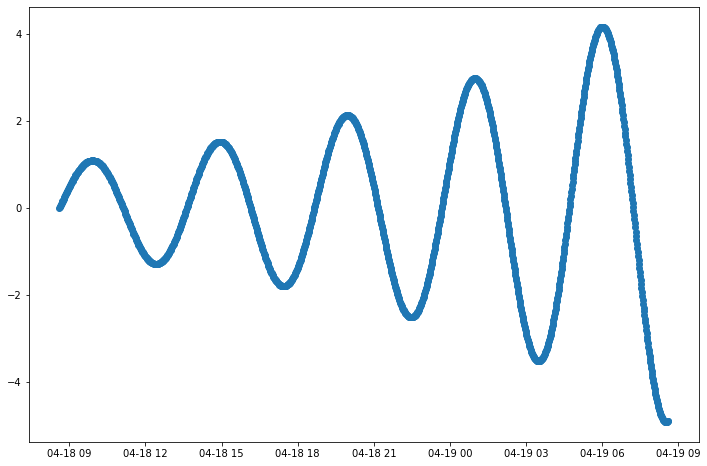

In [ ]:
import datetime as dt
import matplotlib as mpl
dstart = dt.datetime.now()
dend = dstart+dt.timedelta(days=1)
d = mpl.dates.drange(dstart, dend, delta=dt.timedelta(minutes=1))
x = np.linspace(0, 10, len(d//4))
y = np.exp(0.16*x) * np.sin(3*x)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1) # one rows, one column, first plot
ax.plot_date(d,y,linewidth=1)

In [ ]:
import os
print(os.listdir('.'))

[(file[0], os.stat(file[0]).st_size) for file in os.walk('.')]

['.config', 'sample_data']


[('.', 4096),
 ('./.config', 4096),
 ('./.config/configurations', 4096),
 ('./.config/logs', 4096),
 ('./.config/logs/2022.04.08', 4096),
 ('./sample_data', 4096)]

In [ ]:
[ i*22 for i in (1,2,3)]

[22, 44, 66]

π

# REST-Api

https://github.com/RandomAPI/Randomuser.me-Node

In [ ]:
import requests
r = requests.get('https://api.randomuser.me/?nat=US&results=3')
r.json().keys()

dict_keys(['results', 'info'])

In [ ]:
info = r.json()['info']
results = r.json()['results']
info.keys(), results[0].keys()

(dict_keys(['seed', 'results', 'page', 'version']),
 dict_keys(['gender', 'name', 'location', 'email', 'login', 'dob', 'registered', 'phone', 'cell', 'id', 'picture', 'nat']))

In [ ]:
info['results']

3

# 1d_fermions
https://github.com/AustenLamacraft/Theories-of-Quantum-Matter

http://alps.comp-phys.org/mediawiki/index.php/ALPS_2_Tutorials:Overview

In [ ]:
from scipy.stats import unitary_group
from scipy.linalg import eigvals
import matplotlib.pyplot as plt

U = unitary_group.rvs(50)
U_eigvals = eigvals(U)
U_eigvals

array([ 0.8161689 -0.5778134j ,  0.88338448-0.46864896j,
        0.93718895-0.34882212j,  0.96925067-0.24607548j,
        0.98797615-0.15460633j,  0.99979082-0.02045281j,
        0.99242169+0.12287879j,  0.96328712+0.26847332j,
        0.92776625+0.37316188j,  0.82783653+0.56096941j,
        0.79587267+0.60546403j,  0.70093557+0.71322459j,
        0.6394506 +0.76883219j,  0.43738779+0.899273j  ,
        0.41615283+0.90929468j,  0.25423048+0.96714366j,
        0.22365   +0.97466952j,  0.08565462+0.99632489j,
       -0.11114636+0.99380405j, -0.22927175+0.97336245j,
       -0.29796287+0.95457746j,  0.7052263 -0.70898228j,
        0.58927077-0.80793561j,  0.56475817-0.82525645j,
       -0.51078743+0.85970705j, -0.6251278 +0.78052241j,
       -0.69217774+0.72172708j,  0.37057202-0.92880373j,
        0.25797152-0.96615252j,  0.17434876-0.98468397j,
        0.0667801 -0.99776772j, -0.05263491-0.99861382j,
       -0.22941598-0.97332847j, -0.28920706-0.95726656j,
       -0.3500856 -0.93671771j,

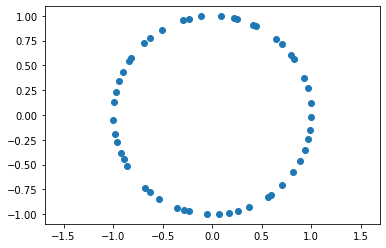

In [ ]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(U_eigvals.real,U_eigvals.imag)
#plt.savefig("1d_fermions.png")

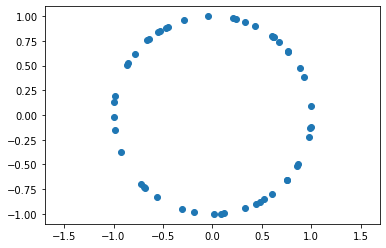

In [ ]:
import numpy as np

poisson_vals = 2 * np.pi * np.random.rand(50)
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(np.cos(poisson_vals),np.sin(poisson_vals))

In [ ]:
import sys
import os
import platform
sys.version, os.name, platform.system(), platform.release(), platform.machine() 

('3.7.13 (default, Mar 16 2022, 17:37:17) \n[GCC 7.5.0]',
 'posix',
 'Linux',
 '5.4.144+',
 'x86_64')

# A ctypes-based adapter to libarchive.
[libarchive](https://github.com/dsoprea/PyEasyArchive)

A very intuitive and useful adapter to libarchive for universal archive access.

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=31e90a23f3a4e338ba329f01eb60fc3d0051805b70faf1c7337e9e3a746400d2
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
import libarchive.public
for entry in libarchive.public.file_pour('/tmp/test.zip'):
    print(entry)

ArchiveError: ignored

![ada](https://www.pngkit.com/png/detail/43-438896_ada-lovelace-color-biografia-de-ada-lovelace.png)

In [ ]:
from PIL import Image
from urllib.request import urlopen
url = 'https://www.pngkit.com/png/detail/43-438896_ada-lovelace-color-biografia-de-ada-lovelace.png'
im = Image.open(urlopen(url))
im.format, im.size, im.mode

('JPEG', (820, 1086), 'RGB')

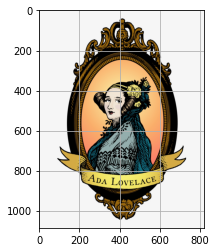

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.imshow(im)
ax.grid()

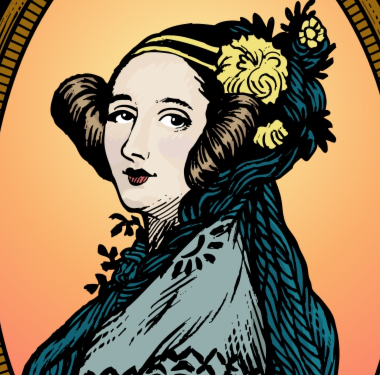

In [ ]:
# (left, upper, right, lower)
box = (220, 335, 600, 710)
region = im.crop(box)
region

In [ ]:
tmp = im.copy()
im_flipped = im.transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)
tmp.paste(transposed, box)
tmp

AttributeError: ignored

In [ ]:
if not "sys" in dir(): import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/haghish/ST516/master/data/titanic.xlsx'
pd.read_excel(url)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


pclass  survived                                  name     sex      age  \
0          1         1                        Haghish, E. F.    male  30.0000   
1          1         1         Allen, Miss. Elisabeth Walton  female  29.0000   
2          1         1        Allison, Master. Hudson Trevor    male   0.9167   
3          1         0          Allison, Miss. Helen Loraine  female   2.0000   
4          1         0  Allison, Mr. Hudson Joshua Creighton    male  30.0000   
...      ...       ...                                   ...     ...      ...   
1305       3         0                  Zabour, Miss. Hileni  female  14.5000   
1306       3         0                 Zabour, Miss. Thamine  female      NaN   
1307       3         0             Zakarian, Mr. Mapriededer    male  26.5000   
1308       3         0                   Zakarian, Mr. Ortin    male  27.0000   
1309       3         0                    Zimmerman, Mr. Leo    male  29.0000   

      sibsp  parch  ticket      fare       cabin embarked boat   body  \
0         0      0   24058   26.5500  A1 Special        S    1    NaN   
1         0      0   24160  211.3375          B5        S    2    NaN   
2         1      2  113781  151.5500     C22 C26        S   11    NaN   
3         1      2  113781  151.5500     C22 C26        S  NaN    NaN   
4         1      2  113781  151.5500     C22 C26        S  NaN  135.0   
...     ...    ...     ...       ...         ...      ...  ...    ...   
1305      1      0    2665   14.4542         NaN        C  NaN  328.0   
1306      1      0    2665   14.4542         NaN        C  NaN    NaN   
1307      0      0    2656    7.2250         NaN        C  NaN  304.0   
1308      0      0    2670    7.2250         NaN        C  NaN    NaN   
1309      0      0  315082    7.8750         NaN        S  NaN    NaN   

                            home.dest  
0                     Odense, Denmark  
1                        St Louis, MO  
2     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
4     Montreal, PQ / Chesterville, ON  
...                               ...  
1305                              NaN  
1306                              NaN  
1307                              NaN  
1308                              NaN  
1309                              NaN  

[1310 rows x 14 columns]

# Sync vs Async

In [ ]:
import time

iteration_times = []
time.time()

1652719621.143032

In [ ]:
import asyncio
import time

async def sleeper(sec):
  time.sleep(sec)
  return 'abc'

sleeper(1)

<coroutine object sleeper at 0x7f44f869d200>

In [ ]:
from urllib.request import urlopen
import json

with urlopen('https://jsonplaceholder.typicode.com/users/1/albums') as request:
    text = request.read()

json.loads(text)

[{'id': 1, 'title': 'quidem molestiae enim', 'userId': 1},
 {'id': 2, 'title': 'sunt qui excepturi placeat culpa', 'userId': 1},
 {'id': 3, 'title': 'omnis laborum odio', 'userId': 1},
 {'id': 4, 'title': 'non esse culpa molestiae omnis sed optio', 'userId': 1},
 {'id': 5, 'title': 'eaque aut omnis a', 'userId': 1},
 {'id': 6, 'title': 'natus impedit quibusdam illo est', 'userId': 1},
 {'id': 7, 'title': 'quibusdam autem aliquid et et quia', 'userId': 1},
 {'id': 8, 'title': 'qui fuga est a eum', 'userId': 1},
 {'id': 9, 'title': 'saepe unde necessitatibus rem', 'userId': 1},
 {'id': 10, 'title': 'distinctio laborum qui', 'userId': 1}]

In [ ]:
import urllib.parse
import urllib.request

url = 'http://www.someserver.com/cgi-bin/register.cgi'
user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'
values = {'name': 'Michael Foord',
          'location': 'Northampton',
          'language': 'Python' }
headers = {'User-Agent': user_agent}

data = urllib.parse.urlencode(values)
data = data.encode('ascii')

req = urllib.request.Request(url, data, headers)
with urllib.request.urlopen(req) as response:
   the_page = response.read()

the_page


b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Someserver.com may be for sale - PerfectDomain.com" />\n<meta property="og:image" content="https://assets.perfectdomain.com/_domainphoto/4/3/a/c/43ac0d2ba062bc36f7ba1056b5f63fbd.jpg" />\n<meta property="og:image:width" content="400" />\n<meta property="og:image:height" content="300" />\n<meta property="og:description" content="Checkout the full domain details of Someserver.com. Click Buy Now to instantly start the transaction or Make an offer to the seller!" />\n\n<meta name="twitter:site" content="@perfectdomain1" />\n<meta name="twitter:card" content="summary" />\n<meta name="twitter:title" content="Someserver.com may be for sale - PerfectDomain.com" />\n<meta name="twit

In [ ]:
numbers = [11, 2, 30, 333, 14, 4444, 100, 2222]
numbers.sort(key=lambda x: len(str(x)))
numbers

[2, 11, 30, 14, 333, 100, 4444, 2222]

# pathlib.Path

In [ ]:
import pathlib

for path in pathlib.Path('./sample_data').glob('*csv'):
  print(path.read_bytes())

b'"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"\n-122.050000,37.370000,27.000000,3885.000000,661.000000,1537.000000,606.000000,6.608500,344700.000000\n-118.300000,34.260000,43.000000,1510.000000,310.000000,809.000000,277.000000,3.599000,176500.000000\n-117.810000,33.780000,27.000000,3589.000000,507.000000,1484.000000,495.000000,5.793400,270500.000000\n-118.360000,33.820000,28.000000,67.000000,15.000000,49.000000,11.000000,6.135900,330000.000000\n-119.670000,36.330000,19.000000,1241.000000,244.000000,850.000000,237.000000,2.937500,81700.000000\n-119.560000,36.510000,37.000000,1018.000000,213.000000,663.000000,204.000000,1.663500,67000.000000\n-121.430000,38.630000,43.000000,1009.000000,225.000000,604.000000,218.000000,1.664100,67000.000000\n-120.650000,35.480000,19.000000,2310.000000,471.000000,1341.000000,441.000000,3.225000,166900.000000\n-122.840000,38.400000,15.000000,3080.000000,617.000000,1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# ./python-one-liners
This repository contains python one-liners obtained from various sources.

[python-one-liners](https://allwin12.github.io/python-one-liners/)
[link](https://allwin12.github.io/python-one-liners/)

In [ ]:
#anagram 
from collections import Counter

s1 = 'below'
s2 = 'elbow'

print('anagram') if Counter(s1) == Counter(s2) else print('not an anagram')

anagram


In [ ]:
import time
import datetime
time.time(), datetime.datetime.now().strftime('%s')

(1651910479.3964307, '1651910479')

In [ ]:
d = {
    'a': 1,
    'b': 2
}

d.items(), d.keys(), d.values()

(dict_items([('a', 1), ('b', 2)]), dict_keys(['a', 'b']), dict_values([1, 2]))

$
lim_{n -> ∞} = \{a_n\} = 0
$

In [ ]:
import fractions

one_half = fractions.Fraction(1, 2)

In [ ]:
[fractions.Fraction(1, i) for i in range(1,10)]

[Fraction(1, 1),
 Fraction(1, 2),
 Fraction(1, 3),
 Fraction(1, 4),
 Fraction(1, 5),
 Fraction(1, 6),
 Fraction(1, 7),
 Fraction(1, 8),
 Fraction(1, 9)]

$
\lambda
$

# Matplotlib

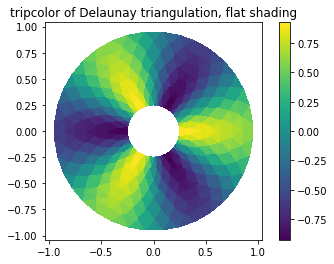

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(
    np.hypot(
        x[triang.triangles].mean(axis=1),
        y[triang.triangles].mean(axis=1)
    ) < min_radius
)
 
fig1, ax1=plt.subplots() 
ax1.set_aspect('equal') 
tpc=ax1.tripcolor(triang, z, shading='flat') 
ax1.set_title('tripcolor of Delaunay triangulation, flat shading')
fig1.colorbar(tpc) 


In [ ]:
import string

def alpha_gen():
  for letter in string.ascii_letters:
    yield letter

g = (letter for letter in string.ascii_letters)
list(g)[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [ ]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

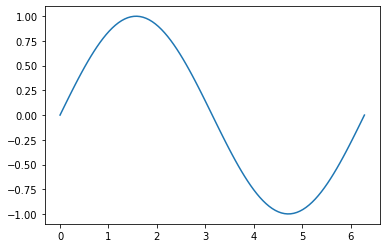

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as mpla

T = np.linspace(0, 2*np.pi, 100)
S = np.sin(T)
line, = plt.plot(T, S)
fig = plt.gcf() #get current picture

def animate(i):
  line.set_ydata(np.sin(T+i/50))

anim = mpla.FuncAnimation(fig, animate, interval=5)
plt.show()

In [ ]:
def on_click(event):
  print(event)

fig.canvas.mpl_connect('button_press_event', on_click)

7

In [ ]:
fig, axes = plt.subplots(1, 1)  # 1x1 grid of subplots

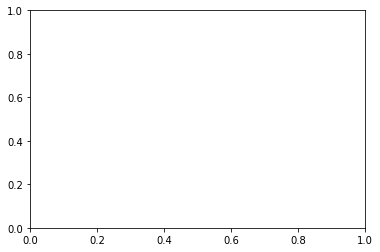

In [ ]:
import matplotlib.pyplot as plt

def process_key(event):
    print("Key:", event.key)

def process_button(event):
    print("Button:", event.x, event.y, event.xdata, event.ydata, event.button)
   
fig, ax = plt.subplots(1, 1)
fig.canvas.mpl_connect('key_press_event', process_key)
fig.canvas.mpl_connect('button_press_event', process_button)
plt.show()

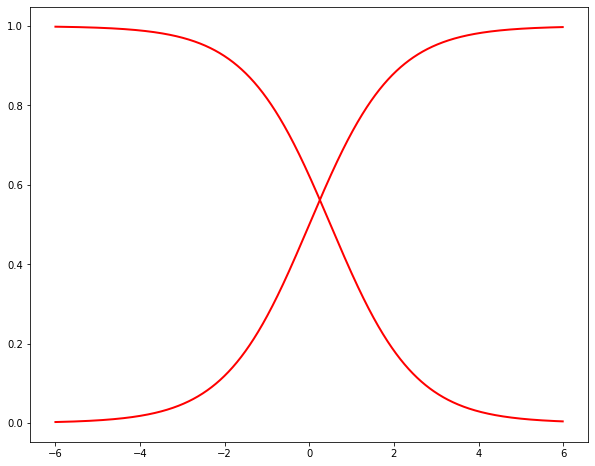

In [ ]:
import numpy as np
import pylab as p

def boltzman(x, xmid, tau):
    """
    evaluate the boltzman function with midpoint xmid and time constant tau
    over x
    """
    return 1. / (1. + np.exp(-(x-xmid)/tau))

x = np.arange(-6, 6, .01)
S = boltzman(x, 0, 1)
Z = 1-boltzman(x, 0.5, 1)
p.figure(figsize=(10,8))
p.plot(x, S, x, Z, color='red', lw=2)

(-0.825, 0.825, -0.825, 0.825)

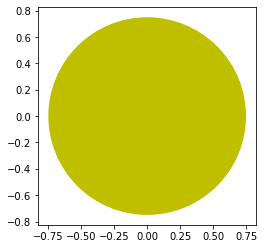

In [ ]:
import matplotlib.pyplot as plt

plt.axes()
circle = plt.Circle((0, 0), radius=0.75, fc='y')
plt.gca().add_patch(circle)
plt.axis('scaled')

In [ ]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="576pt" version="1.1" viewBox="0 0 720 576" width="720pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <defs>\n  <style type="text/css">\n*{stroke-linecap:butt;stroke-linejoin:round;}\n  </style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 576 \nL 720 576 \nL 720 0 \nL 0 0 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="ax_1">\n   <g id="patch_2">\n    <path d="M 618.39 288 \nC 618.39 254.068536 611.706241 220.467013 598.721232 189.118428 \nC 585.736223 157.769843 566.702489 129.283847 542.709321 105.290679 \nC 518.716153 81.297511 490.230157 62.263777 458.881572 49.278768 \nC 427.532987 36.293759 393.931464 29.61 360 29.61 \nC 326.068536 29.61 292.467013 36.293759 261.118428 49.278768 \nC 229.76984

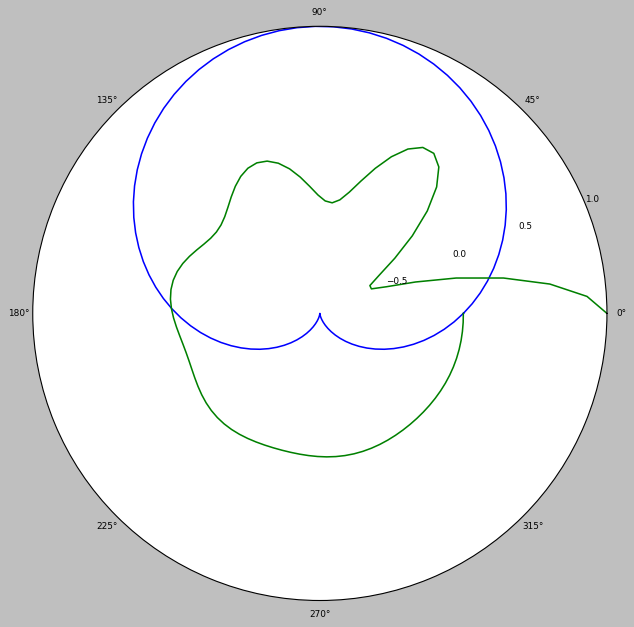

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import io
plt.style.use('seaborn-paper')

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

fig, ax=plt.subplots(figsize=(10,8), subplot_kw={"projection":"polar"})
ax.set_gid('ax_1')
fig.tight_layout()

t = np.linspace(0, 2*np.pi, 100)

ax.plot(t, np.sin(t), color='blue',  gid='plot_1')
ax.plot(t, f(t),      color='green', gid='plot_2')
ax.grid()
svg_image = io.BytesIO()
_ = plt.savefig(svg_image, format = "svg")
xml_string = svg_image.getvalue().decode()
xml_string

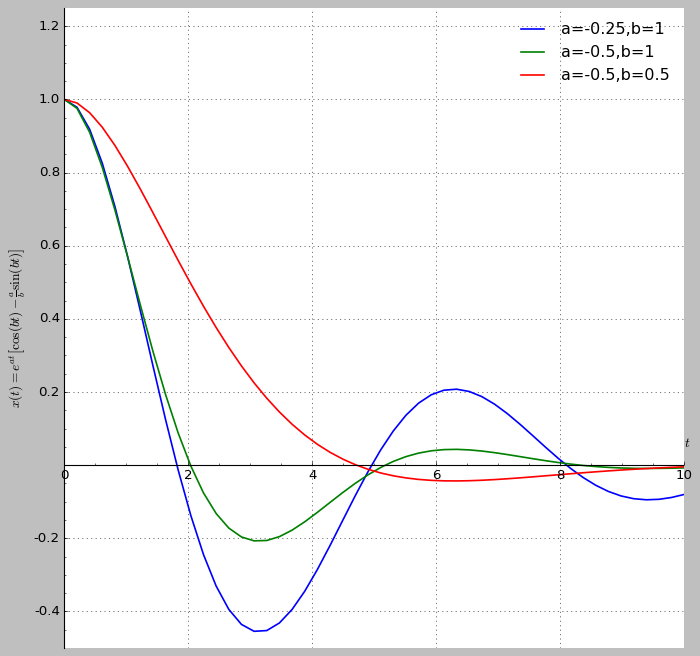

In [ ]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.axisartist import *

style.use('classic')
time = linspace(0,10)
fun = lambda a,b,t: exp(a*t) * (cos(b*t) - (a/b) * sin(b*t))

fig = figure(figsize=(10,10))
ax1 = Subplot(fig,"111")
ax1.axis["right"].set_visible(False)
#ax1.axis["left"].set_axisline_style("-&#x7C;>")
ax1.axis["top"].set_visible(False)
ax1.axis["bottom"].set_visible(False)
ax1.axis["x"] = ax1.new_floating_axis(0,0)
#ax1.axis["x"].set_axisline_style("-&#x7C;>")

ax1.plot(time,fun(-.25, 1., time),lw=1.5,label='a=-0.25,b=1')
ax1.plot(time,fun(-.5,1.,time),lw=1.5,label='a=-0.5,b=1')
ax1.plot(time,fun(-.5,.5,time),lw=1.5,label='a=-0.5,b=0.5')
ax1.grid(True)
ax1.text(10,.05,r'$t$')
ax1.set_ylabel(r'$x(t)=e^{at} \left[ \cos(bt) - \frac{a}{b}\sin(bt) \right]$')
ax1.set_ylim(-.5,1.25)
ax1.set_yticks(arange(-0.4,1.25,.2))
ylabels = []
for i in arange(-0.4,1.25,.2):
	if i != 0:
		ylabels = append(ylabels,"%.1f"%i)
	else:
		ylabels = append(ylabels,"")
ax1.set_yticklabels(ylabels)
ax1.minorticks_on()
ax1.legend(frameon=False)
fig.add_subplot(ax1)
#fig.savefig("test.png", bbox_inches="tight", pad_inches=.15)

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="666.72pt" version="1.1" viewBox="0 0 684 666.72" width="684pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <defs>\n  <style type="text/css">\n*{stroke-linecap:butt;stroke-linejoin:round;}\n  </style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 666.72 \nL 684 666.72 \nL 684 0 \nL 0 0 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="patch_2">\n   <path d="M 7.2 659.52 \nL 676.8 659.52 \nL 676.8 7.2 \nL 7.2 7.2 \nz\n" style="fill:#ffffff;"/>\n  </g>\n  <g id="ax_1">\n   <g id="Poly3DCollection_1">\n    <path clip-path="url(#p9811824441)" d="M 365.555987 506.394614 \nL 354.368226 510.490134 \nL 370.013513 538.161086 \nL 379.699645 531.417343 \nz\n" style="fill:#1c2d81;fill-opacity:0.9;"/>\n    <path cl

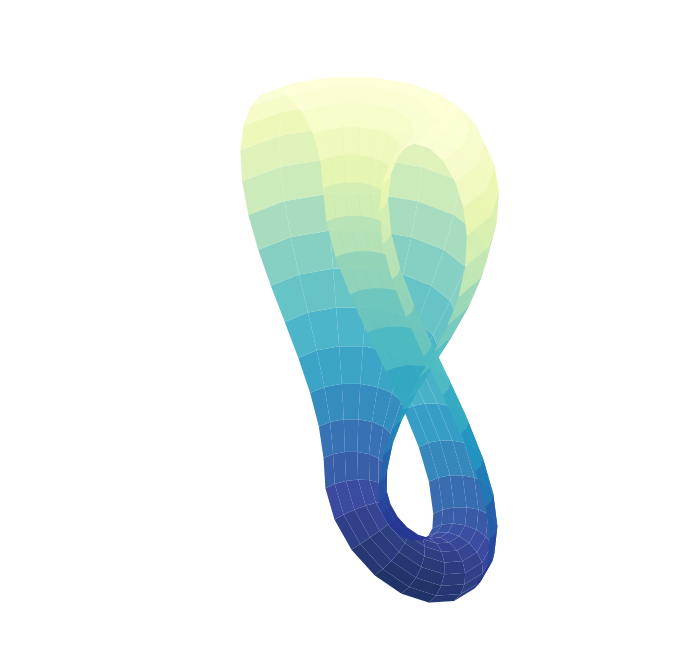

In [ ]:
#from __future__ import division
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, linspace, cos, sin
import io

def x_(u, v):
    x = -2 + 2*cos(v) - cos(u)
    x[v<3*pi] = -2 + (2 + cos(u[v<3*pi]))*cos(v[v<3*pi])
    x[v<2*pi] = cos(u[v<2*pi])*(2.5 - 1.5*cos(v[v<2*pi]))
    return x

def y_(u, v):
    y = sin(u)
    y[v<2*pi] = sin(u[v<2*pi])*(2.5 - 1.5*cos(v[v<2*pi]))
    return y

def z_(u, v):
    z = -3*v + 12*pi
    z[v<3*pi] = (2 + cos(u[v<3*pi]))*sin(v[v<3*pi]) + 3*pi
    z[v<2*pi] = 3*v[v<2*pi] - 3*pi
    z[v<pi] = -2.5*sin(v[v<pi])
    return z

 
u = linspace(pi, 2*pi, 10)
v = linspace(0, 4*pi, 38)
u, v = np.meshgrid(u, v)

x = x_(u, v)
y = y_(u, v)
z = -z_(u, v)

fig, ax = plt.subplots(
    figsize=(12,12), 
    subplot_kw={
      'projection': '3d',
      'gid': 'ax_1',
    })
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='YlGnBu_r', alpha=.9, lw=1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-9, 1)
ax.view_init(azim=130, elev=30)
plt.axis(False)

svg_image = io.BytesIO()
_ = plt.savefig(svg_image, format = "svg", bbox_inches="tight", transparent=False)
xml_string = svg_image.getvalue().decode()
xml_string
#plt.savefig("KleinBottle-cut.svg", bbox_inches="tight", transparent=True)

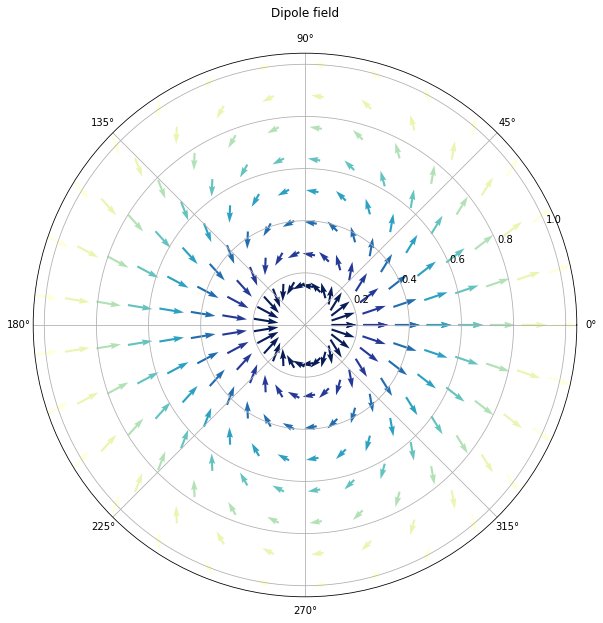

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='polar')

n=30
m=8

thetas = np.linspace(0, 2*np.pi, n)
radii = np.linspace(0.15, 1, m)
theta, r = np.meshgrid(thetas, radii)
p = .3
Er = p*2*np.cos(theta)#/r**3
Et = p*np.sin(theta)#/r**3
#we leave out the 1/r**3 part because it would make our arrows infinitely long near the origin.
#Instead we use a colormap to indicate the strength of the field as follows

ax.set_title("Dipole field", va='bottom')
ax.quiver(theta, r, Er * np.cos(theta) - Et * np.sin (theta), Er * np.sin(theta) + Et * np.cos(theta), r, pivot='mid', cmap='YlGnBu_r')

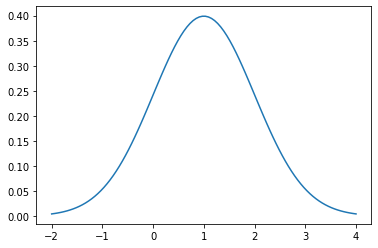

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

mu = 1
sigma = 1

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)

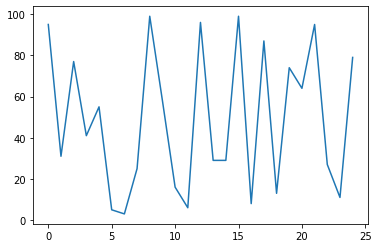

In [ ]:
data = np.random.randint(1, 1000, 300)
range = 100 # slider("Range", 0, 1000)
data = [x for x in data if x < range ]
fig, ax = plt.subplots()
ax.plot(data)

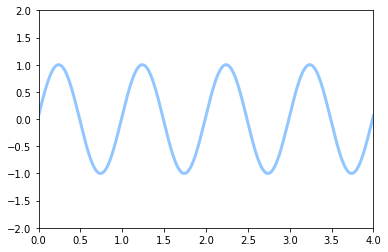

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, frames=200, interval=20, blit=True) #init_func=init, 

HTML(anim.to_html5_video())

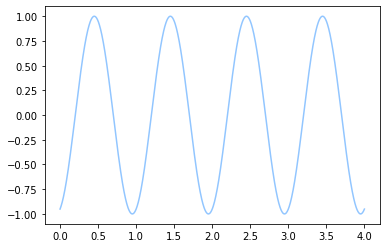

In [ ]:
fig,ax = plt.subplots()
#line, = ax.plot(0, 0)
x = np.linspace(0, 4, 1000)
y = np.sin(2 * np.pi * (x - 0.01 *20))
line, = ax.plot(x,y)

# Triple Pendulum CHAOS!
approaches than brute-force algebra, that rely on higher abstractions: one such approach is known as Kane's Method. This method still involves a significant amount of book-keeping for any but the most trivial problems, but the Sympy package has a nice implementation that handles the details for you. This is the approach I took to simulate the triple pendulum, borrowing heavily from Gede et al. 2013 who present a nice example of Sympy's API for applying Kane's Method.

/usr/local/lib/python3.7/dist-packages/sympy/physics/mechanics/kane.py:534: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


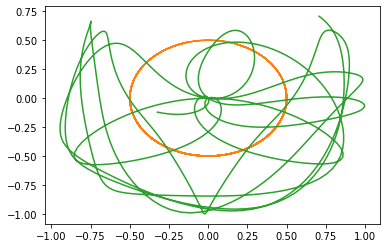

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols
from sympy.physics import mechanics

from sympy import Dummy, lambdify
from scipy.integrate import odeint


def integrate_pendulum(n, times,
                       initial_positions=135,
                       initial_velocities=0,
                       lengths=None, masses=1):
    """Integrate a multi-pendulum with `n` sections"""
    #-------------------------------------------------
    # Step 1: construct the pendulum model
    
    # Generalized coordinates and velocities
    # (in this case, angular positions & velocities of each mass) 
    q = mechanics.dynamicsymbols('q:{0}'.format(n))
    u = mechanics.dynamicsymbols('u:{0}'.format(n))

    # mass and length
    m = symbols('m:{0}'.format(n))
    l = symbols('l:{0}'.format(n))

    # gravity and time symbols
    g, t = symbols('g,t')
    
    #--------------------------------------------------
    # Step 2: build the model using Kane's Method

    # Create pivot point reference frame
    A = mechanics.ReferenceFrame('A')
    P = mechanics.Point('P')
    P.set_vel(A, 0)

    # lists to hold particles, forces, and kinetic ODEs
    # for each pendulum in the chain
    particles = []
    forces = []
    kinetic_odes = []

    for i in range(n):
        # Create a reference frame following the i^th mass
        Ai = A.orientnew('A' + str(i), 'Axis', [q[i], A.z])
        Ai.set_ang_vel(A, u[i] * A.z)

        # Create a point in this reference frame
        Pi = P.locatenew('P' + str(i), l[i] * Ai.x)
        Pi.v2pt_theory(P, A, Ai)

        # Create a new particle of mass m[i] at this point
        Pai = mechanics.Particle('Pa' + str(i), Pi, m[i])
        particles.append(Pai)

        # Set forces & compute kinematic ODE
        forces.append((Pi, m[i] * g * A.x))
        kinetic_odes.append(q[i].diff(t) - u[i])

        P = Pi

    # Generate equations of motion
    KM = mechanics.KanesMethod(A, q_ind=q, u_ind=u, kd_eqs=kinetic_odes)
    fr, fr_star = KM.kanes_equations(forces, particles)
    
    #-----------------------------------------------------
    # Step 3: numerically evaluate equations and integrate

    # initial positions and velocities – assumed to be given in degrees
    y0 = np.deg2rad(np.concatenate([np.broadcast_to(initial_positions, n),
                                    np.broadcast_to(initial_velocities, n)]))
        
    # lengths and masses
    if lengths is None:
        lengths = np.ones(n) / n
    lengths = np.broadcast_to(lengths, n)
    masses = np.broadcast_to(masses, n)

    # Fixed parameters: gravitational constant, lengths, and masses
    parameters = [g] + list(l) + list(m)
    parameter_vals = [9.81] + list(lengths) + list(masses)

    # define symbols for unknown parameters
    unknowns = [Dummy() for i in q + u]
    unknown_dict = dict(zip(q + u, unknowns))
    kds = KM.kindiffdict()

    # substitute unknown symbols for qdot terms
    mm_sym = KM.mass_matrix_full.subs(kds).subs(unknown_dict)
    fo_sym = KM.forcing_full.subs(kds).subs(unknown_dict)

    # create functions for numerical calculation 
    mm_func = lambdify(unknowns + parameters, mm_sym)
    fo_func = lambdify(unknowns + parameters, fo_sym)

    # function which computes the derivatives of parameters
    def gradient(y, t, args):
        vals = np.concatenate((y, args))
        sol = np.linalg.solve(mm_func(*vals), fo_func(*vals))
        return np.array(sol).T[0]

    # ODE integration
    return odeint(gradient, y0, times, args=(parameter_vals,))

def get_xy_coords(p, lengths=None):
    """Get (x, y) coordinates from generalized coordinates p"""
    p = np.atleast_2d(p)
    n = p.shape[1] // 2
    if lengths is None:
        lengths = np.ones(n) / n
    zeros = np.zeros(p.shape[0])[:, None]
    x = np.hstack([zeros, lengths * np.sin(p[:, :n])])
    y = np.hstack([zeros, -lengths * np.cos(p[:, :n])])
    return np.cumsum(x, 1), np.cumsum(y, 1)

# Here are the paths of a double pendulum over time:
t = np.linspace(0, 10, 1000)
p = integrate_pendulum(n=2, times=t)
x, y = get_xy_coords(p)
plt.plot(x, y);    

/usr/local/lib/python3.7/dist-packages/sympy/physics/mechanics/kane.py:534: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


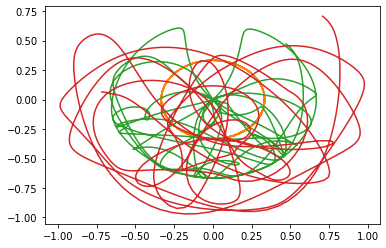

In [ ]:
# And here are the positions of a triple pendulum over time:
p = integrate_pendulum(n=3, times=t)
x, y = get_xy_coords(p)
plt.plot(x, y);

In [ ]:
from matplotlib import animation

def animate_pendulum(n):
    t = np.linspace(0, 10, 200)
    p = integrate_pendulum(n, t)
    x, y = get_xy_coords(p)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.set(xlim=(-1, 1), ylim=(-1, 1))

    line, = ax.plot([], [], 'o-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(x[i], y[i])
        return line,

    anim = animation.FuncAnimation(fig, animate, frames=len(t),
                                   interval=1000 * t.max() / len(t),
                                   blit=True, init_func=init)
    plt.close(fig)
    return anim

anim = animate_pendulum(3)
# In the notebook

from IPython.display import HTML
HTML(anim.to_html5_video())

/usr/local/lib/python3.7/dist-packages/sympy/physics/mechanics/kane.py:534: SymPyDeprecationWarning: 

The kanes_equation() argument order has been deprecated since SymPy
1.1. Use switched argument order to update your code, For example:
kanes_equations(loads, bodies) > kanes_equations(bodies, loads).
instead. See https://github.com/sympy/sympy/issues/10945 for more
info.  The API for kanes_equations() has changed such that the loads
(forces and torques) are now the second argument and is optional with
None being the default.

  issue=10945, deprecated_since_version="1.1").warn()


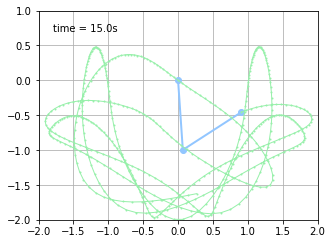

In [ ]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 15  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)

time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(f'time = {i*dt:.1f}s')
    return line, trace, time_text


anim = animation.FuncAnimation(fig, animate, len(y), interval=dt*3000, blit=True)

HTML(anim.to_html5_video())

In [ ]:
i = 10
dt = 0.02
f'time = {i*dt:.1f}s'

'time = 0.2s'

# Drawing and Animating Shapes with Matplotlib
[](https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html)

In fact, everything drawn using Matplotlib is part of the artists API module. It’s just a different level of access for drawing shapes compared to plots.

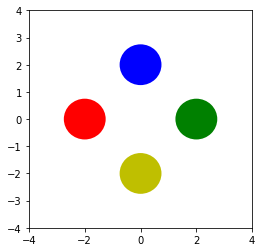

In [ ]:
from matplotlib import pyplot as plt
import io
from IPython.display import HTML

fig = plt.figure(figsize=(4,4))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

circle1 = plt.Circle((0, 2),  radius=0.75, fc='b', gid='circle1')
circle2 = plt.Circle((2, 0),  radius=0.75, fc='g', gid='circle1')
circle3 = plt.Circle((0, -2), radius=0.75, fc='y', gid='circle1')
circle4 = plt.Circle((-2, 0), radius=0.75, fc='r', gid='circle1')

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)

#ax.axis('scaled') # xlim, ylim not used

svg_image = io.BytesIO()
_ = plt.savefig(svg_image, format = "svg", bbox_inches="tight", transparent=False)
xml_string = svg_image.getvalue().decode()
HTML(xml_string)

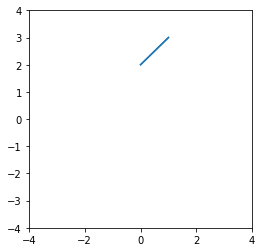

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

fig = plt.figure(figsize=(4,4))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

x = (0, 1)
y = (2, 3)
#line = plt.Line2D(x, y)
line, = plt.plot(x,y)
ax.add_line(line) # line is an Artist itself and so its not added as a patch. 

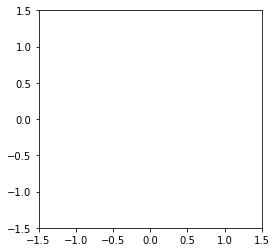

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


fig = plt.figure(figsize=(4,4))
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

#x = ()
#y = ()
#line = plt.Line2D(x, y)
#line, = plt.plot(x,y, 'o')
#ax.add_line(line)

def init():
  x = ()
  y = ()
  line, = plt.plot(x,y, 'o')
  return line


def animate(frame):
  # update plot
  x = np.cos(frame/100 * 2*np.pi)
  y = np.sin(frame/100 * 2*np.pi)
  line.set_data((x, y))

init()
animate = FuncAnimation(fig=fig, func=animate, init_func=init, frames=100, interval=20)
html = animate.to_html5_video()
HTML(html)

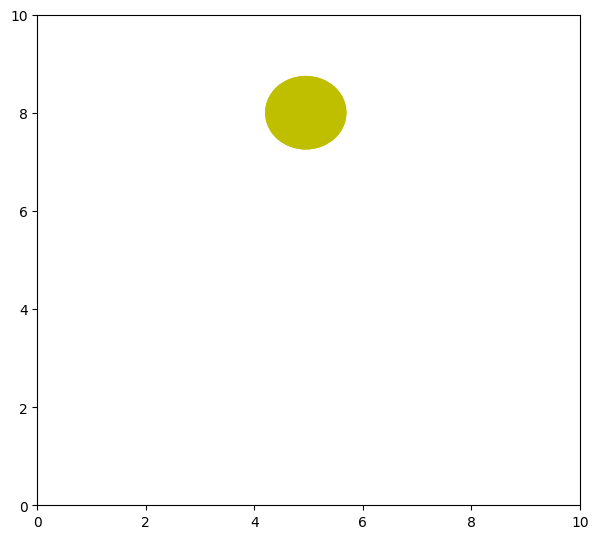

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# fig,ax = plt.subplots()
# line, = ax.plot(0, 0)

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,

anim = FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
html = anim.to_html5_video()

HTML(html)

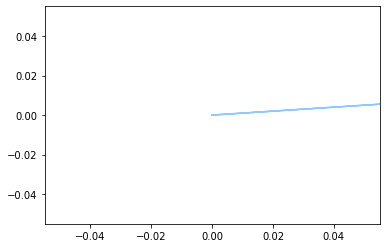

In [ ]:
from IPython.core.display import display_html
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

x = []
y = []
fig,ax = plt.subplots()
line, = ax.plot(0, 0)

def animation_frame(i):
  x.append(i*10)
  y.append(i)

  line.set_xdata(x)
  line.set_ydata(y)
  return line

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, 10, 0.01), interval=1)
# This saves the animation as an h264 video, encoded in base64 directly into the HTML5 video tag.
video = animation.to_html5_video()
html = display.HTML(video)
html

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')


ModuleNotFoundError: ignored

In [5]:
! pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 508 kB 5.3 MB/s 
     |████████████████████████████████| 11.2 MB 36.3 MB/s 
     |████████████████████████████████| 930 kB 40.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

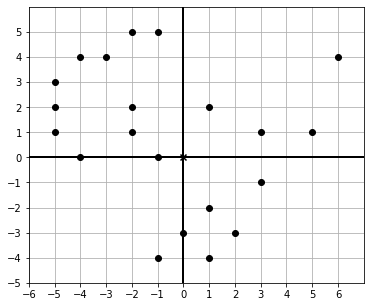

In [ ]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'

class Polygon():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Points():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors(objects):
    for object in objects:
        if type(object) == Polygon:
            for v in object.vertices:
                yield v
        elif type(object) == Points:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow:
            yield object.tip
            yield object.tail
        elif type(object) == Segment:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon:
            for i in range(0,len(object.vertices)):
                x1, y1 = object.vertices[i]
                x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                xs = [v[0] for v in object.vertices]
                ys = [v[1] for v in object.vertices]
                plt.gca().fill(xs,ys,object.fill,alpha=object.alpha)
        elif type(object) == Points:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

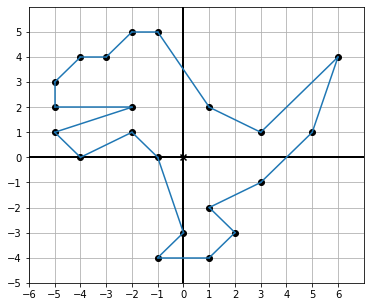

In [ ]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

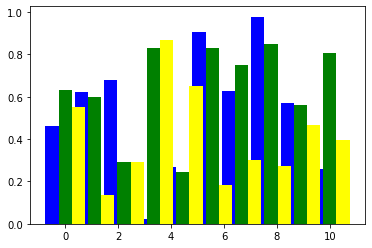

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import io
from xml.dom import minidom
from IPython.display import IFrame, HTML

svg_image = io.BytesIO()
fig,ax = plt.subplots()
size = 10
a = np.random.rand(size)
b = np.random.rand(size)
c = np.random.rand(size)
x = np.linspace(0, size, size)
ax.bar(x-0.5, a, width=0.5, color='blue',  align='center')
ax.bar(x,     b, width=0.5, color='green', align='center')
ax.bar(x+0.5, c, width=0.5, color='yellow', align='center')
ax.autoscale(tight=False)
svg_image = io.BytesIO()
_ = plt.savefig(svg_image, format = "svg")
xml_string = svg_image.getvalue().decode()
#dom = minidom.parseString(xml_string)
#nodelist = dom.getElementsByTagName('svg')
#svg_image = ''.join([node.toxml() for node in nodelist])
HTML(xml_string)

Building histograms using Rectangles and PolyCollections
========================================================

Using a path patch to draw rectangles.
The technique of using lots of Rectangle instances, or
the faster method of using PolyCollections, were implemented before we
had proper paths with moveto/lineto, closepoly etc in mpl.  Now that
we have them, we can draw collections of regularly shaped objects with
homogeneous properties more efficiently with a PathCollection. This
example makes a histogram -- it's more work to set up the vertex arrays
at the outset, but it should be much faster for large numbers of
objects.

(0.0, 62.0)

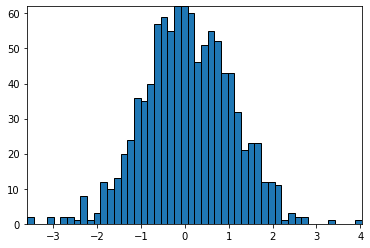

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = bins[:-1]
right = bins[1:]
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

(0.0, 62.0)

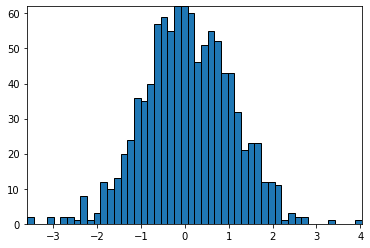

In [ ]:
fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = bins[:-1]
right = bins[1:]
bottom = np.zeros(len(left))
top = bottom + n

# It should be noted that instead of creating a three-dimensional array and
# using `~.path.Path.make_compound_path_from_polys`, we could as well create
# the compound path directly using vertices and codes as shown below

nrects = len(left)
nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

In [ ]:
from IPython.display import IFrame, HTML

IFrame(src='./nice.html', width=700, height=600)
HTML('<h1> hello </h1>')

In [ ]:
svg_image = '''
<svg version="1.1" baseProfile="full" width="300" height="200" xmlns="http://www.w3.org/2000/svg">
  <rect width="100%" height="100%" fill="black" />
  <circle cx="150" cy="100" r="90" fill="blue" />
</svg>    
'''.strip()

svg_image

'<svg version="1.1" baseProfile="full" width="300" height="200" xmlns="http://www.w3.org/2000/svg">\n  <rect width="100%" height="100%" fill="black" />\n  <circle cx="150" cy="100" r="90" fill="blue" />\n</svg>'

(-1.5, 1.5)

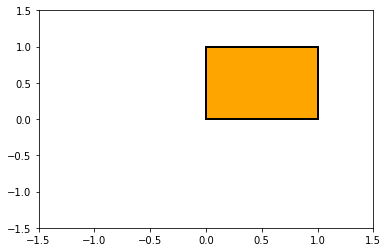

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

In [ ]:
path

Path(array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.]]), array([ 1,  2,  2,  2, 79], dtype=uint8))